# **Import Modules**

## *python*

In [1]:
# Import python modules
import os
import sys

## *custom*

In [2]:
# Import customised modules

# Define path
sys.path.append(os.path.abspath(os.path.join("..")))

# Import relevant modules
try:
    from scripts._05_forecast_trends import ForecastTrend

    print("Module successfully imported.")

except ImportError:
    print("Could not import module from `scripts/`.")

Module successfully imported.


# **Time Series Forecasting (LSTM)**

In [3]:
# Load class input paths
# Specify directory
ntbk_dir = os.getcwd()  # Gets the directory of the notebook
plot_dir = os.path.join(ntbk_dir, "..", "insights", "forecasted")
processed_dir = os.path.join(ntbk_dir, "..", "data", "processed")

## *TSLA*

🧪 Running full forecasting pipeline...

Datatypes changed.
🔹DataFrame Head:


,Date,Close,High,Low,Open,Volume,Trend,Volatility,Daily Return,Log Close
0,2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500,NaN,NaN,-0.042328,2.882489
1,2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500,NaN,NaN,-0.048231,2.833056
2,2015-07-09,17.194668,17.530001,17.119333,17.271999,50011500,NaN,NaN,0.011610,2.844599
3,2015-07-10,17.276667,17.533333,17.188000,17.481333,39163500,NaN,NaN,0.004769,2.849357
4,2015-07-13,17.477333,17.503332,17.070000,17.483334,44404500,NaN,NaN,0.011615,2.860905



🔹 Shape: (2532, 10)

🔹 Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Trend', 'Volatility', 'Daily Return', 'Log Close']

🔹 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2532 non-null   datetime64[ns]
 1   Close         2532 non-null   float64       
 2   High          2532 non-null   float64       
 3   Low           2532 non-null   float64       
 4   Open          2532 non-null   float64       
 5   Volume        2532 non-null   int32         
 6   Trend         2506 non-null   float64       
 7   Volatility    2506 non-null   float64       
 8   Daily Return  2532 non-null   float64       
 9   Log Close     2532 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int32(1)
memory usage: 188.1 KB


⚖️ Data scaling completed.

📥 Loaded LSTM model from ..\model\fin

,Date,Forecasted Close,Forecasted Volatility,Forecasted Return,Forecasted Trend,Upper Bound,Lower Bound
0,2025-07-31,305.217163,NaN,NaN,NaN,361.532227,248.902115
1,2025-08-01,298.587006,NaN,-0.021723,NaN,354.902039,242.271957
2,2025-08-04,310.214111,NaN,0.038940,NaN,366.529175,253.899063
3,2025-08-05,312.678925,NaN,0.007946,NaN,368.993958,256.363892
4,2025-08-06,315.205078,NaN,0.008079,NaN,371.520142,258.890015



💾 Forecast DataFrame saved to ..\data\processed\TSLA_forecasted_df.csv

💾 Forecast plot saved to ..\insights\forecasted\TSLA_close_trend_vol_return_forecast.png


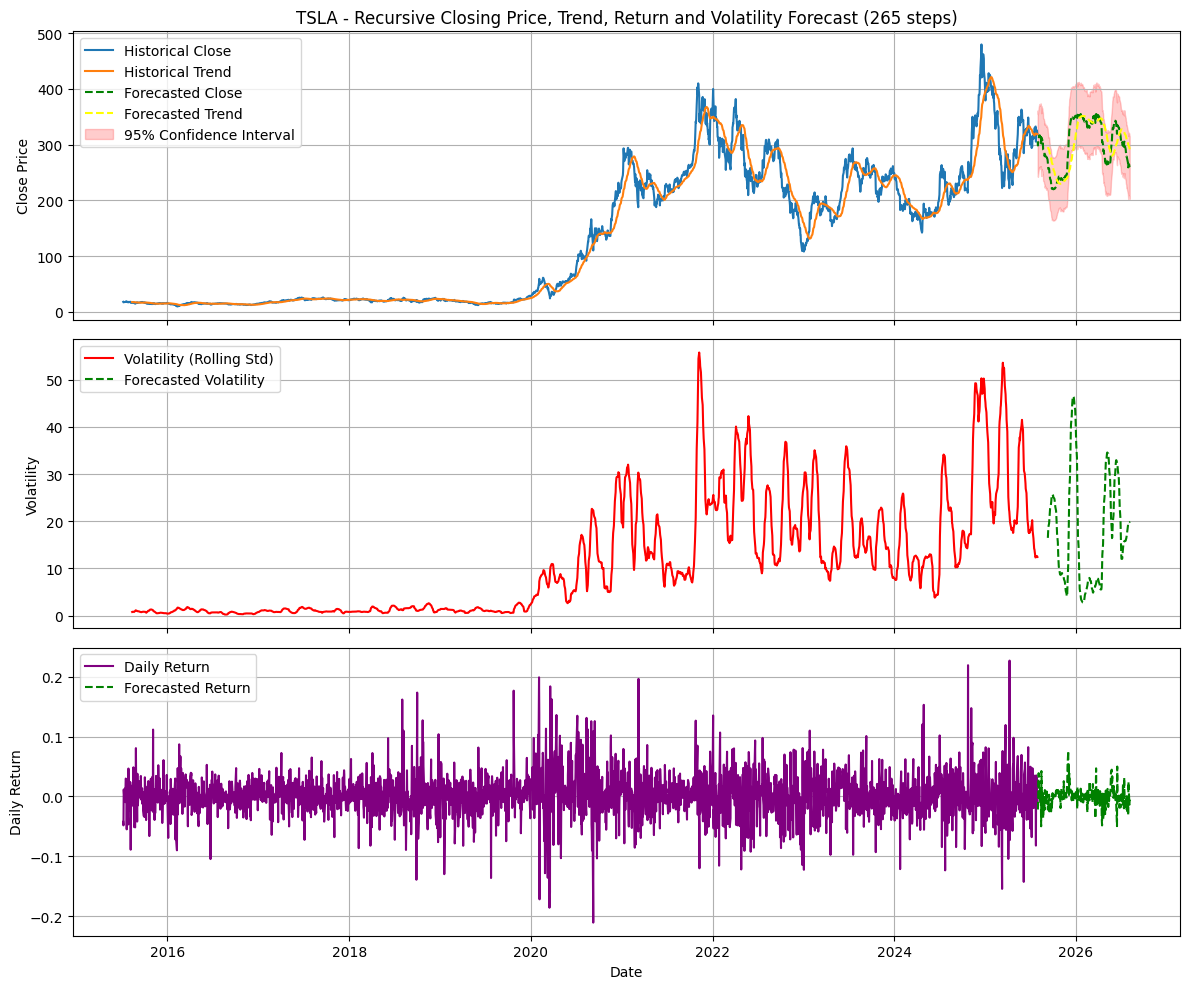

In [4]:
# Tesla (TSLA) Historical stock prices
forecaster = ForecastTrend(
    asset_name="TSLA",
    processed_path=os.path.join(ntbk_dir, "..", "data/processed/TSLA_log_enriched.csv"),
    plot_dir=plot_dir,
    processed_dir=processed_dir,
    model_path=os.path.join(
        ntbk_dir, "..", "model/finetuned_lstm/TSLA_lstm_model_tuned.keras"
    ),
    look_back=120,  # To capture longer-term cycles and momentum shifts
    steps=265,  # Forecasting for 12 months (265 trading days)
)
forecaster.trend_forecaster()

In [5]:
shifted_forecasts = forecaster.simulate_return_shift(shift_percent=0.10)

,Date,Forecasted Close,Forecasted Volatility,Forecasted Return,Forecasted Trend,Upper Bound,Lower Bound
0,2025-07-31,305.224731,NaN,NaN,NaN,361.539795,248.909683
1,2025-08-01,297.313629,NaN,-0.025919,NaN,353.628662,240.998581
2,2025-08-04,310.177002,NaN,0.043265,NaN,366.492065,253.861954
3,2025-08-05,312.660858,NaN,0.008008,NaN,368.975891,256.345825
4,2025-08-06,315.184174,NaN,0.008070,NaN,371.499207,258.869141



💾 Forecast DataFrame saved to ..\data\processed\TSLA_forecasted_df.csv


,Date,Forecasted Close,Forecasted Volatility,Forecasted Return,Forecasted Trend,Upper Bound,Lower Bound
0,2025-07-31,305.209473,NaN,NaN,NaN,361.524536,248.894424
1,2025-08-01,299.807800,NaN,-0.017698,NaN,356.122864,243.492752
2,2025-08-04,310.237762,NaN,0.034789,NaN,366.552795,253.922714
3,2025-08-05,312.690216,NaN,0.007905,NaN,369.005249,256.375183
4,2025-08-06,315.220093,NaN,0.008091,NaN,371.535156,258.905029



💾 Forecast DataFrame saved to ..\data\processed\TSLA_forecasted_df.csv


## *BND*

🧪 Running full forecasting pipeline...

Datatypes changed.
🔹DataFrame Head:


,Date,Close,High,Low,Open,Volume,Trend,Volatility,Daily Return,Log Close
0,2015-07-07,61.237724,61.470766,61.237724,61.410630,4183200,NaN,NaN,0.000983,4.114763
1,2015-07-08,61.410606,61.463229,61.312875,61.373017,1967800,NaN,NaN,0.002823,4.117583
2,2015-07-09,61.207657,61.327940,61.177586,61.312902,1670900,NaN,NaN,-0.003305,4.114272
3,2015-07-10,60.921989,61.012202,60.854329,60.906951,2038300,NaN,NaN,-0.004667,4.109594
4,2015-07-13,60.779121,60.899404,60.771602,60.786641,2846500,NaN,NaN,-0.002345,4.107246



🔹 Shape: (2532, 10)

🔹 Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Trend', 'Volatility', 'Daily Return', 'Log Close']

🔹 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2532 non-null   datetime64[ns]
 1   Close         2532 non-null   float64       
 2   High          2532 non-null   float64       
 3   Low           2532 non-null   float64       
 4   Open          2532 non-null   float64       
 5   Volume        2532 non-null   int32         
 6   Trend         2506 non-null   float64       
 7   Volatility    2506 non-null   float64       
 8   Daily Return  2532 non-null   float64       
 9   Log Close     2532 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int32(1)
memory usage: 188.1 KB


⚖️ Data scaling completed.

📥 Loaded LSTM model from ..\model\fin

,Date,Forecasted Close,Forecasted Volatility,Forecasted Return,Forecasted Trend,Upper Bound,Lower Bound
0,2025-07-31,72.107437,NaN,NaN,NaN,72.759583,71.455292
1,2025-08-01,72.077736,NaN,-0.000412,NaN,72.729881,71.425591
2,2025-08-04,72.036789,NaN,-0.000568,NaN,72.688934,71.384644
3,2025-08-05,71.975357,NaN,-0.000853,NaN,72.627502,71.323212
4,2025-08-06,71.928940,NaN,-0.000645,NaN,72.581085,71.276794



💾 Forecast DataFrame saved to ..\data\processed\BND_forecasted_df.csv

💾 Forecast plot saved to ..\insights\forecasted\BND_close_trend_vol_return_forecast.png


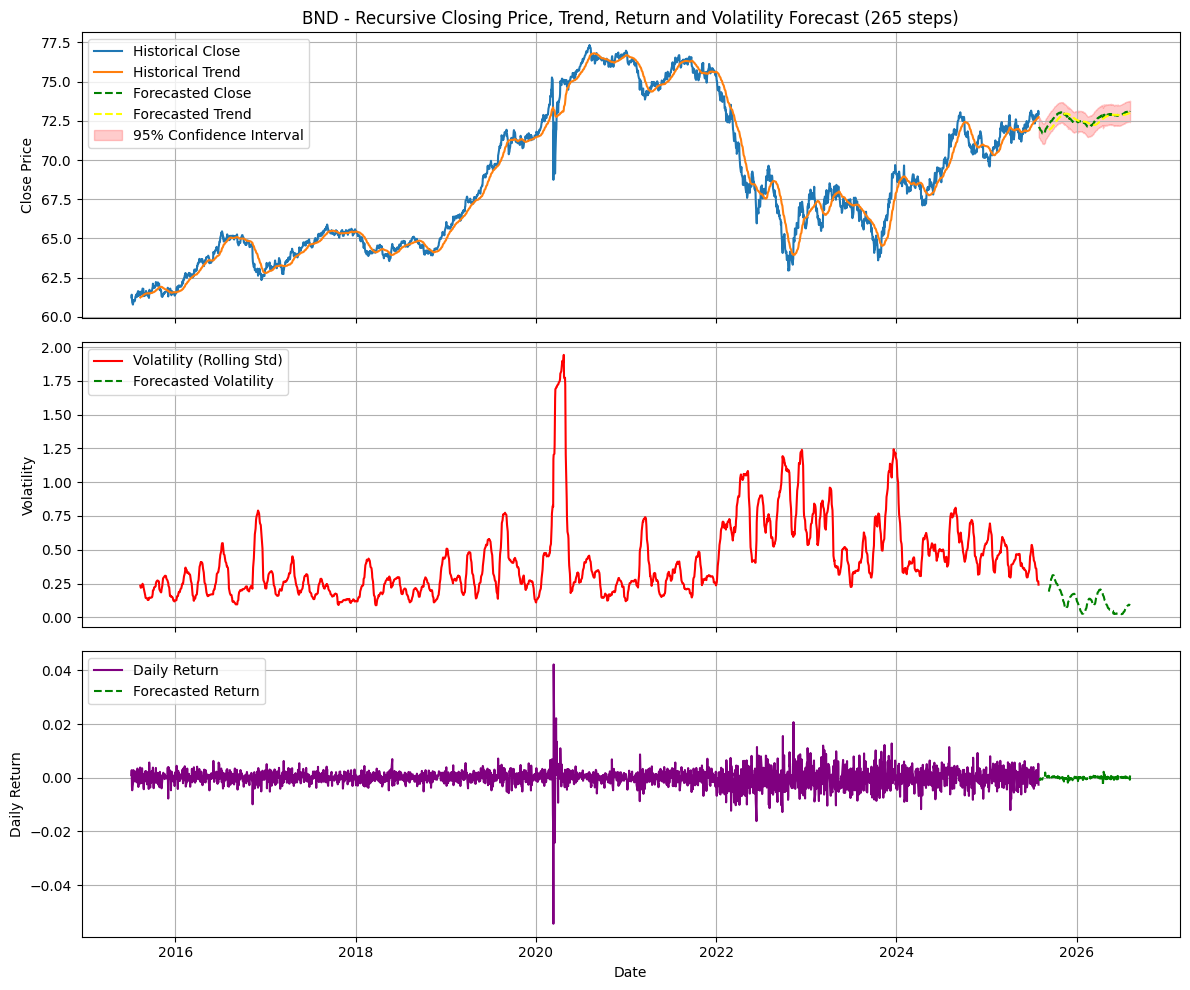

In [6]:
# Vanguard Total Bond Market ETF (BND)
forecaster = ForecastTrend(
    asset_name="BND",
    processed_path=os.path.join(ntbk_dir, "..", "data/processed/BND_log_enriched.csv"),
    processed_dir=processed_dir,
    model_path=os.path.join(
        ntbk_dir, "..", "model/finetuned_lstm/BND_lstm_model_tuned.keras"
    ),
    plot_dir=plot_dir,
    look_back=60,  # Shorter window suffices due to stability
    steps=265,  # Forecasting for 12 months (265 trading days)
)
forecaster.trend_forecaster()

## *SPY*

🧪 Running full forecasting pipeline...

Datatypes changed.
🔹DataFrame Head:


,Date,Close,High,Low,Open,Volume,Trend,Volatility,Daily Return,Log Close
0,2015-07-07,175.355453,175.481894,172.059422,174.461903,173820200,NaN,NaN,0.006288,5.166815
1,2015-07-08,172.413437,174.293265,172.177405,174.006657,164020100,NaN,NaN,-0.016777,5.149895
2,2015-07-09,172.725311,174.790607,172.615733,174.529275,144113100,NaN,NaN,0.001809,5.151703
3,2015-07-10,174.900238,175.321725,172.767515,174.740071,129456900,NaN,NaN,0.012592,5.164216
4,2015-07-13,176.830658,176.940236,176.130988,176.173139,106069400,NaN,NaN,0.011037,5.175193



🔹 Shape: (2532, 10)

🔹 Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Trend', 'Volatility', 'Daily Return', 'Log Close']

🔹 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2532 non-null   datetime64[ns]
 1   Close         2532 non-null   float64       
 2   High          2532 non-null   float64       
 3   Low           2532 non-null   float64       
 4   Open          2532 non-null   float64       
 5   Volume        2532 non-null   int32         
 6   Trend         2506 non-null   float64       
 7   Volatility    2506 non-null   float64       
 8   Daily Return  2532 non-null   float64       
 9   Log Close     2532 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int32(1)
memory usage: 188.1 KB


⚖️ Data scaling completed.

📥 Loaded LSTM model from ..\model\fin

,Date,Forecasted Close,Forecasted Volatility,Forecasted Return,Forecasted Trend,Upper Bound,Lower Bound
0,2025-07-31,566.889099,NaN,NaN,NaN,584.067505,549.710693
1,2025-08-01,569.158020,NaN,0.004002,NaN,586.336426,551.979614
2,2025-08-04,565.607056,NaN,-0.006239,NaN,582.785461,548.428650
3,2025-08-05,563.902161,NaN,-0.003014,NaN,581.080566,546.723755
4,2025-08-06,561.072266,NaN,-0.005018,NaN,578.250671,543.893860



💾 Forecast DataFrame saved to ..\data\processed\SPY_forecasted_df.csv

💾 Forecast plot saved to ..\insights\forecasted\SPY_close_trend_vol_return_forecast.png


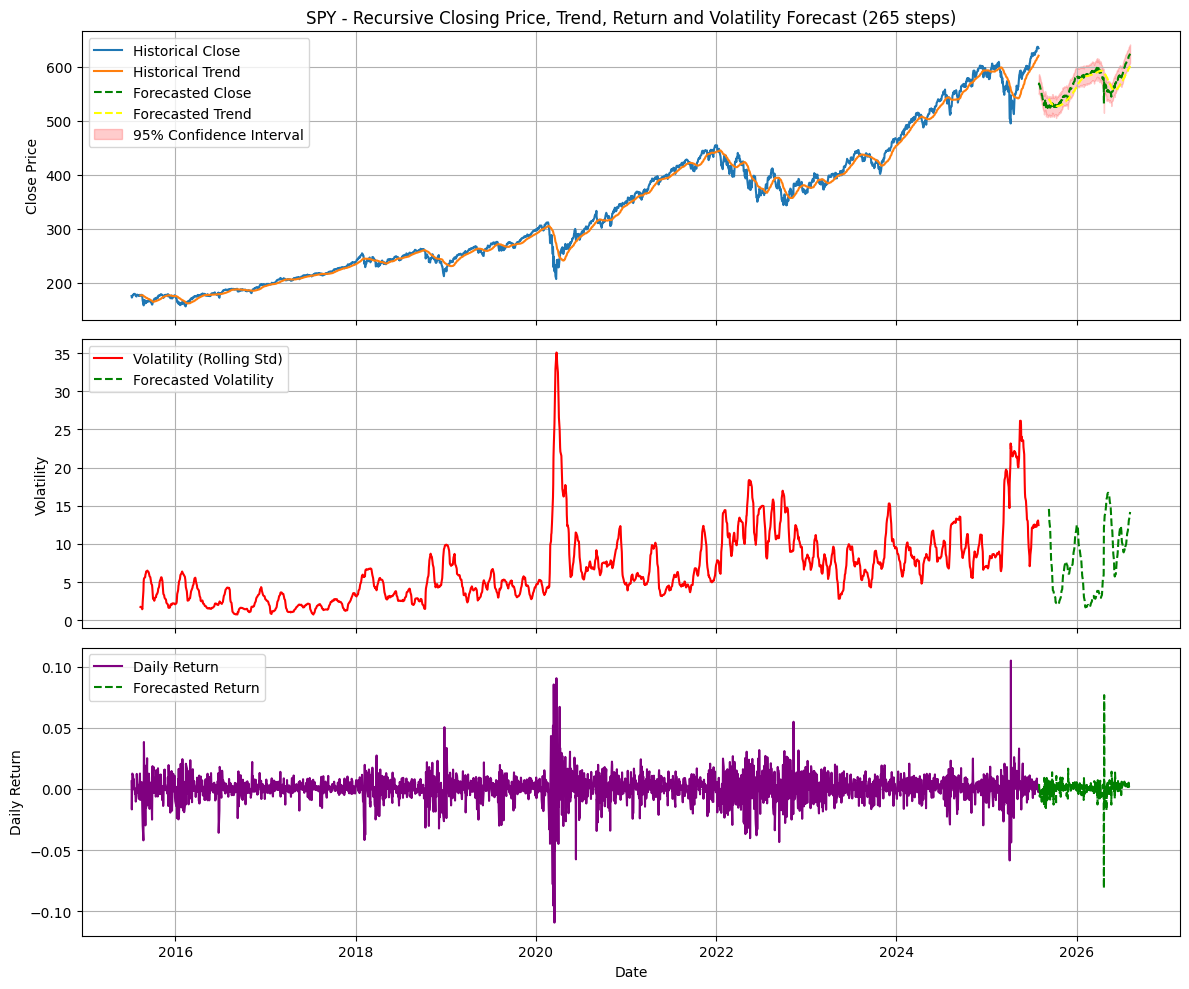

In [7]:
# S&P 500 ETF (SPY)
forecaster = ForecastTrend(
    asset_name="SPY",
    processed_path=os.path.join(ntbk_dir, "..", "data/processed/SPY_log_enriched.csv"),
    processed_dir=processed_dir,
    model_path=os.path.join(
        ntbk_dir, "..", "model/finetuned_lstm/SPY_lstm_model_tuned.keras"
    ),
    plot_dir=plot_dir,
    look_back=90,  # Balance trend detection with noise reduction
    steps=265,  # Forecasting for 12 months (265 trading days)
)
forecaster.trend_forecaster()